In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_csv("MCLawAcceptance.csv")
df.head()

,Unnamed: 0,lsat,gpa,essaygrade level,Score,accepted
0,1,137,2.76,13,127.994667,0
1,2,160,3.61,12,148.381333,0
2,3,133,3.32,13,134.082667,0
3,4,154,3.03,14,145.777333,0
4,5,157,3.32,13,141.085333,0


In [3]:
df.columns

Index(['Unnamed: 0', 'lsat', 'gpa', 'essaygrade level', 'Score', 'accepted'], dtype='object')

In [4]:
df.columns = ['studentNum', 'lsat', 'gpa', 'essayGradeLevel', 'admissionsScore', 'accepted']
df.head()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted
0,1,137,2.76,13,127.994667,0
1,2,160,3.61,12,148.381333,0
2,3,133,3.32,13,134.082667,0
3,4,154,3.03,14,145.777333,0
4,5,157,3.32,13,141.085333,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studentNum       2062 non-null   int64  
 1   lsat             2062 non-null   int64  
 2   gpa              2062 non-null   float64
 3   essayGradeLevel  2062 non-null   int64  
 4   admissionsScore  2062 non-null   float64
 5   accepted         2062 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 96.8 KB


In [6]:
df.describe()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted
count,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000
mean,1031.500000,150.222114,2.967459,13.497090,139.730635,0.021823
std,595.392448,10.717724,0.604743,1.914915,14.975185,0.146142
min,1.000000,122.000000,1.930000,9.000000,96.972000,0.000000
25%,516.250000,142.000000,2.450000,12.000000,128.945792,0.000000
50%,1031.500000,150.000000,2.970000,13.000000,139.372583,0.000000
75%,1546.750000,158.000000,3.500000,15.000000,150.249208,0.000000
max,2062.000000,179.000000,4.000000,18.000000,187.680833,1.000000


# DATA DISTRIBUTIONS

<AxesSubplot:xlabel='lsat', ylabel='Count'>

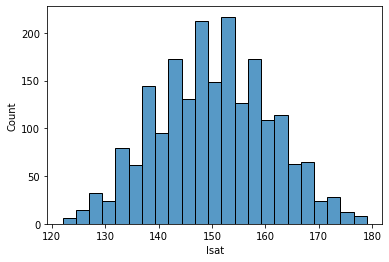

In [9]:
sns.histplot(df["lsat"], kde = False)

<AxesSubplot:xlabel='gpa', ylabel='Count'>

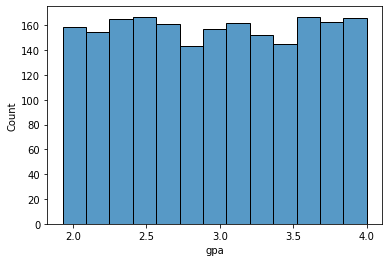

In [10]:
sns.histplot(df["gpa"], kde = False)

<AxesSubplot:xlabel='essayGradeLevel', ylabel='Count'>

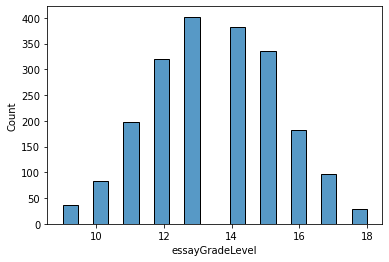

In [11]:
sns.histplot(df["essayGradeLevel"], kde = False)

<AxesSubplot:xlabel='admissionsScore', ylabel='Count'>

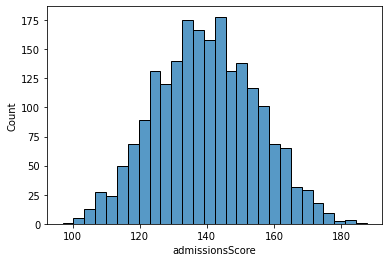

In [12]:
sns.histplot(df["admissionsScore"], kde = False)

<AxesSubplot:xlabel='accepted', ylabel='Count'>

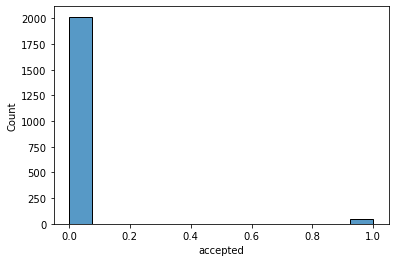

In [13]:
sns.histplot(df["accepted"], kde = False)

In [15]:
# add new column indicating accepted yes or no, corresponding with 1 and 0

df["Accepted"] = np.where(df["accepted"] == 1, "Yes", "No")
df.head()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted
0,1,137,2.76,13,127.994667,0,No
1,2,160,3.61,12,148.381333,0,No
2,3,133,3.32,13,134.082667,0,No
3,4,154,3.03,14,145.777333,0,No
4,5,157,3.32,13,141.085333,0,No


In [16]:
# checking to make sure 1 = Yes

df.loc[df["Accepted"] == "Yes"]

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted
72,73,150,3.48,15,172.074000,1,Yes
132,133,147,3.48,16,171.656000,1,Yes
161,162,140,3.47,15,172.890833,1,Yes
168,169,159,2.94,17,170.187667,1,Yes
186,187,155,3.81,16,173.308000,1,Yes
222,223,166,3.72,13,176.319333,1,Yes
224,225,161,3.54,17,175.705333,1,Yes
261,262,171,3.22,15,170.045000,1,Yes
283,284,150,3.69,13,175.620000,1,Yes
358,359,160,3.78,16,178.698667,1,Yes


## FINDING OUTLIERS

In [20]:
# none appear in the distributions above, but still checking

# 1. LSAT scores

# creating new column with z-scores
df["zscoreLsat"] = np.abs(stats.zscore(df["lsat"]))

# identifying outliers with z-scores > 3
outlierLsat = df.loc[df["zscoreLsat"]>3].index

print(outlierLsat)

# no outliers

Int64Index([], dtype='int64')


In [21]:
# 2. GPA

#creating new column with z-scores
df["zscoreGpa"] = np.abs(stats.zscore(df["gpa"]))

#identifying outliers with z-scores >3
outliersGpa = df.loc[df["zscoreGpa"]>3].index

print(outliersGpa)

#no outliers

Int64Index([], dtype='int64')


In [22]:
#3. Admissions score

#creating new column with z-scores
df["zscoreAdmissionsScore"] = np.abs(stats.zscore(df["admissionsScore"]))

#identifying outliers with z-score > 3
outliersAdmissionsScore = df.loc[df["zscoreAdmissionsScore"]>3].index

print(outliersAdmissionsScore)

#no outliers

Int64Index([789], dtype='int64')


## FINDING CORRELATIONS

In [25]:
df["lsat"].groupby(df["Accepted"]).mean()

# minimal difference in lsat

Accepted
No     150.110064
Yes    155.244444
Name: lsat, dtype: float64

<AxesSubplot:xlabel='Accepted', ylabel='lsat'>

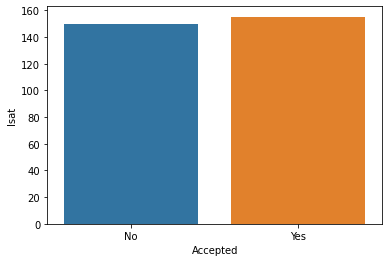

In [30]:
sns.barplot(data = df, x = "Accepted", y = "lsat", ci = None)

In [26]:
df["gpa"].groupby(df["Accepted"]).mean()

# big difference in GPA

Accepted
No     2.953089
Yes    3.611556
Name: gpa, dtype: float64

<AxesSubplot:xlabel='Accepted', ylabel='gpa'>

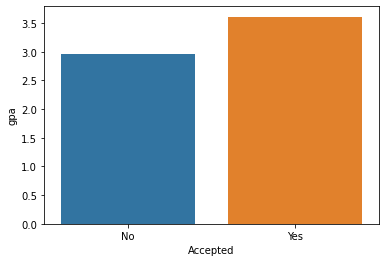

In [31]:
sns.barplot(data = df, x = "Accepted", y = "gpa", ci = None)

In [28]:
df["essayGradeLevel"].groupby(df["Accepted"]).mean()

# older students admitted

Accepted
No     13.462568
Yes    15.044444
Name: essayGradeLevel, dtype: float64

<AxesSubplot:xlabel='Accepted', ylabel='essayGradeLevel'>

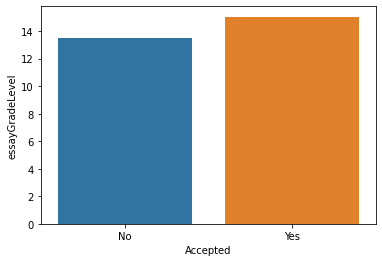

In [32]:
sns.barplot(data = df, x = "Accepted", y = "essayGradeLevel", ci = None)

In [29]:
df["admissionsScore"].groupby(df["Accepted"]).mean()

# huge difference in admissions score

Accepted
No     138.965942
Yes    174.005863
Name: admissionsScore, dtype: float64

<AxesSubplot:xlabel='Accepted', ylabel='admissionsScore'>

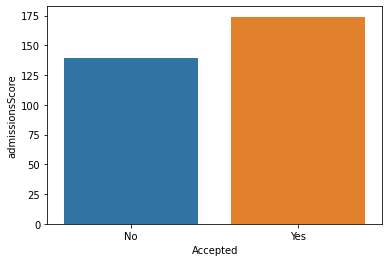

In [33]:
sns.barplot(data = df, x = "Accepted", y = "admissionsScore", ci = None)

In [65]:
#binning lsat scores

bins = [120, 139, 159, 180]
lsatLabels = ["120-139", "140-159","160-179"]

df["lsatLevels"] = pd.cut(df["lsat"], bins, labels = lsatLabels)

df.head()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted,zscoreLsat,zscoreGpa,zscoreAdmissionsScore,lsatLevels,gpaLevels,Grade Level,AdmissionLevel
0,1,137,2.76,13,127.994667,0,No,1.233967,0.343136,0.783884,120-139,2.5-2.9,Undergraduate Level,115-134
1,2,160,3.61,12,148.381333,0,No,0.912531,1.062760,0.577809,160-179,3.5-4.0,High School,135-154
2,3,133,3.32,13,134.082667,0,No,1.607271,0.583101,0.377247,120-139,3.0-3.4,Undergraduate Level,135-154
3,4,154,3.03,14,145.777333,0,No,0.352575,0.103443,0.403879,140-159,3.0-3.4,Undergraduate Level,135-154
4,5,157,3.32,13,141.085333,0,No,0.632553,0.583101,0.090485,140-159,3.0-3.4,Undergraduate Level,135-154


In [39]:
# checking bins to ensure upper & lower limits

df.loc[df["lsat"]==140]

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted,zscoreLsat,zscoreGpa,zscoreAdmissionsScore,lsatLevels,gpaLevels,Grade Level
143,144,140,2.17,14,141.216833,0,No,0.953989,1.318993,0.099268,140-159,1.9-2.4,Undergraduate Level
158,159,140,3.37,14,145.555833,0,No,0.953989,0.665801,0.389084,140-159,3.0-3.4,Undergraduate Level
161,162,140,3.47,15,172.890833,1,Yes,0.953989,0.831201,2.214880,140-159,3.5-4.0,Undergraduate Level
184,185,140,1.96,15,138.072667,0,No,0.953989,1.666332,0.110741,140-159,1.9-2.4,Undergraduate Level
190,191,140,3.48,14,164.864000,0,No,0.953989,0.847741,1.678741,140-159,3.5-4.0,Undergraduate Level
276,277,140,3.16,16,144.948667,0,No,0.953989,0.318462,0.348530,140-159,3.0-3.4,Undergraduate Level
344,345,140,2.46,15,132.094667,0,No,0.953989,0.839334,0.510032,140-159,2.5-2.9,Undergraduate Level
381,382,140,3.82,17,153.309667,0,No,0.953989,1.410099,0.906989,140-159,3.5-4.0,Graduate Level
482,483,140,2.54,11,113.923333,0,No,0.953989,0.707015,1.723756,140-159,2.5-2.9,High School
578,579,140,2.24,12,120.576000,0,No,0.953989,1.203213,1.279402,140-159,1.9-2.4,High School


In [66]:
# binning gpas

bins = [1.9, 2.4, 2.9, 3.4, 4.0]
gpaLevels = ["1.9-2.4", "2.5-2.9", "3.0-3.4", "3.5-4.0"]

df["gpaLevels"] = pd.cut(df["gpa"], bins, labels = gpaLevels)
df.head()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted,zscoreLsat,zscoreGpa,zscoreAdmissionsScore,lsatLevels,gpaLevels,Grade Level,AdmissionLevel
0,1,137,2.76,13,127.994667,0,No,1.233967,0.343136,0.783884,120-139,2.5-2.9,Undergraduate Level,115-134
1,2,160,3.61,12,148.381333,0,No,0.912531,1.062760,0.577809,160-179,3.5-4.0,High School,135-154
2,3,133,3.32,13,134.082667,0,No,1.607271,0.583101,0.377247,120-139,3.0-3.4,Undergraduate Level,135-154
3,4,154,3.03,14,145.777333,0,No,0.352575,0.103443,0.403879,140-159,3.0-3.4,Undergraduate Level,135-154
4,5,157,3.32,13,141.085333,0,No,0.632553,0.583101,0.090485,140-159,3.0-3.4,Undergraduate Level,135-154


In [87]:
# binning essay grade level

bins = [9, 12, 16, 20]
gradeLevels = ["High School", "Undergraduate Level", "Graduate Level"]

df["GradeLevel"] = pd.cut(df["essayGradeLevel"], bins, labels = gradeLevels)
df.head()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted,zscoreLsat,zscoreGpa,zscoreAdmissionsScore,lsatLevels,gpaLevels,Grade Level,AdmissionLevel,GradeLevel
0,1,137,2.76,13,127.994667,0,No,1.233967,0.343136,0.783884,120-139,2.5-2.9,Undergraduate Level,115-134,Undergraduate Level
1,2,160,3.61,12,148.381333,0,No,0.912531,1.062760,0.577809,160-179,3.5-4.0,High School,135-154,High School
2,3,133,3.32,13,134.082667,0,No,1.607271,0.583101,0.377247,120-139,3.0-3.4,Undergraduate Level,135-154,Undergraduate Level
3,4,154,3.03,14,145.777333,0,No,0.352575,0.103443,0.403879,140-159,3.0-3.4,Undergraduate Level,135-154,Undergraduate Level
4,5,157,3.32,13,141.085333,0,No,0.632553,0.583101,0.090485,140-159,3.0-3.4,Undergraduate Level,135-154,Undergraduate Level


In [68]:
# binning admission score

bins = [95, 114, 134, 154, 174, 190]

admissionLevels = ["95-114", "115-134", "135-154", "155-174", "175-188"]

df["AdmissionLevel"] = pd.cut(df["admissionsScore"], bins, labels = admissionLevels)

df.head()

,studentNum,lsat,gpa,essayGradeLevel,admissionsScore,accepted,Accepted,zscoreLsat,zscoreGpa,zscoreAdmissionsScore,lsatLevels,gpaLevels,Grade Level,AdmissionLevel
0,1,137,2.76,13,127.994667,0,No,1.233967,0.343136,0.783884,120-139,2.5-2.9,Undergraduate Level,115-134
1,2,160,3.61,12,148.381333,0,No,0.912531,1.062760,0.577809,160-179,3.5-4.0,High School,135-154
2,3,133,3.32,13,134.082667,0,No,1.607271,0.583101,0.377247,120-139,3.0-3.4,Undergraduate Level,135-154
3,4,154,3.03,14,145.777333,0,No,0.352575,0.103443,0.403879,140-159,3.0-3.4,Undergraduate Level,135-154
4,5,157,3.32,13,141.085333,0,No,0.632553,0.583101,0.090485,140-159,3.0-3.4,Undergraduate Level,135-154


## MORE CORRELATIONS

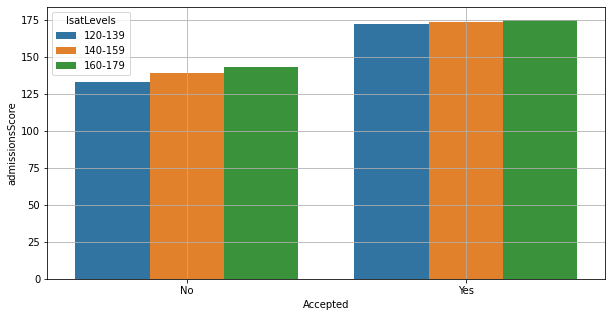

In [46]:
# barplot comparing admission score and lsat levels, per admission status

plt.figure(figsize=(10,5))

sns.barplot(data = df, x = "Accepted", y = "admissionsScore", hue = "lsatLevels", ci = None)

plt.grid()

# interesting: all lsat levels proportionally represented among both admissions groups

In [48]:
df["admissionsScore"].groupby(df["lsatLevels"]).mean()

lsatLevels
120-139    133.397127
140-159    139.988684
160-179    144.356190
Name: admissionsScore, dtype: float64

<AxesSubplot:xlabel='lsatLevels', ylabel='admissionsScore'>

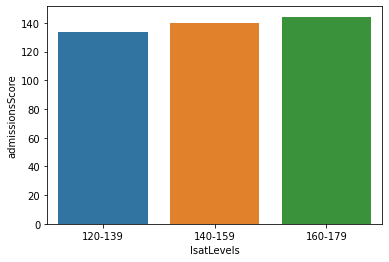

In [49]:
sns.barplot(data = df, x = "lsatLevels", y = "admissionsScore", ci = None)

# greater lsat score associated with greater admissions score

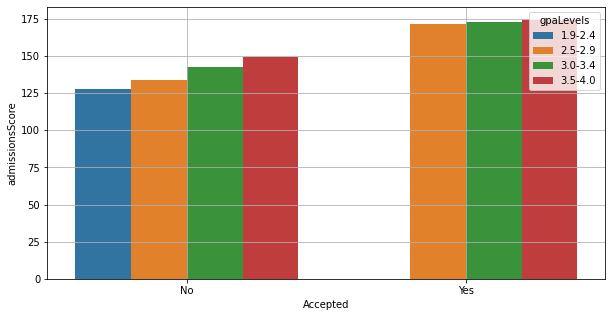

In [50]:
# barplot comparing admission score and gpa levels, per admission status

plt.figure(figsize=(10,5))

sns.barplot(data = df, x = "Accepted", y = "admissionsScore", hue = "gpaLevels", ci = None)

plt.grid()

# similar pattern to above, with gpa levels proportionally represented among both admissions groups
# there is a cutoff gpa for acceptance, as no one with gpa < 2.5 is accepted

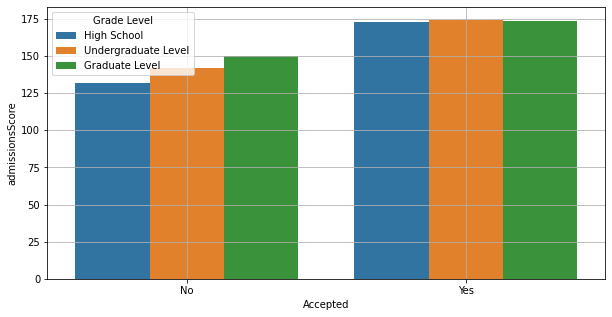

In [52]:
# barplot comparing admission score and gpa levels, per admission status

plt.figure(figsize=(10,5))

sns.barplot(data = df, x = "Accepted", y = "admissionsScore", hue = "Grade Level", ci = None)

plt.grid()

# similar pattern to above, with grade levels proportionally represented among both admissions groups
# all grade levels are accepted

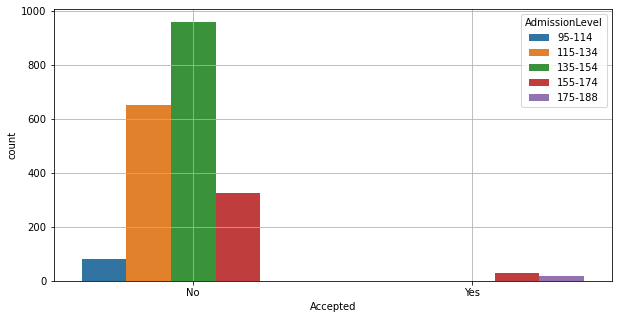

In [59]:
# barplot comparing admission score and acceptance

plt.figure(figsize=(10,5))

sns.countplot(data = df, x = "Accepted", hue = "AdmissionLevel")

plt.grid()

# cutoff for admission score is somewhere within 155 - 174 range

## LOGISTIC REGRESSION TO DETERMINE ACCEPTANCE

In [61]:
#  create the logistic model to predict acceptance based on lsat, gpa, and admissions score (without grade level because it produced a singular matrix..??)

mod = sm.logit('accepted ~ lsat + gpa + admissionsScore', data=df).fit()

mod.summary()

#LLR p-value indicates good model
#independent variable p-values are insignificant

         Current function value: 0.000001
         Iterations: 35


C:\Users\liket\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\liket\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\liket\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accepted   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2058
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                   1.000
Time:                        10:53:22   Log-Likelihood:             -0.0010842
converged:                      False   LL-Null:                       -216.62
Covariance Type:            nonrobust   LLR p-value:                 1.396e-93
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6238.0318   2.35e+04     -0.266      0.790   -5.22e+04    3.97e+04
lsat                0.1246      4.345      0.029      0.977      -8.392       8.641
gpa               -18.9265    151.660     -0.125      0.901    -316.175     278.322
admissionsScore    36.9691    139.320      0.265      0.791    -236.093     310.031
===================================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
#  create the logistic model to predict acceptance based on lsat, gpa, and admissions score, without intercept

mod2 = sm.logit('accepted ~ lsat + gpa + admissionsScore -1', data=df).fit()

mod2.summary()

#LLR p-value indicates good model AND all independent variable p-values are significant

Optimization terminated successfully.
         Current function value: 0.070422
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accepted   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2059
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.3297
Time:                        10:55:05   Log-Likelihood:                -145.21
converged:                       True   LL-Null:                       -216.62
Covariance Type:            nonrobust   LLR p-value:                 9.702e-32
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lsat               -0.1710      0.016    -10.590      0.000      -0.203      -0.139
gpa                -1.3920      0.391     -3.561      0.000      -2.158      -0.626
admissionsScore     0.1707      0.019      9.097      0.000       0.134       0.208
===================================================================================
"""

In [85]:
#  create the logistic model to predict acceptance based on lsat, gpa, and grade level (without admissions score because it produced a singular matrix..??)

mod3 = sm.logit('accepted ~ lsat + essayGradeLevel + gpa', data=df).fit()

mod3.summary()

#LLR p-value indicates good model
#independent variable p-values are insignificant

Optimization terminated successfully.
         Current function value: 0.079431
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accepted   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2058
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.2439
Time:                        11:18:04   Log-Likelihood:                -163.79
converged:                       True   LL-Null:                       -216.62
Covariance Type:            nonrobust   LLR p-value:                 9.395e-23
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -28.0887      3.454     -8.132      0.000     -34.858     -21.319
lsat                0.0517      0.016      3.331      0.001       0.021       0.082
essayGradeLevel     0.5121      0.091      5.638      0.000       0.334       0.690
gpa                 2.7122      0.437      6.201      0.000       1.855       3.569
===================================================================================
"""

In [86]:
#  create the logistic model to predict acceptance based on lsat, gpa, and grade level, without intercept

mod4 = sm.logit('accepted ~ lsat + essayGradeLevel + gpa -1', data=df).fit()

mod4.summary()

#not as good of a model as model 3

Optimization terminated successfully.
         Current function value: 0.101277
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accepted   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2059
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                 0.03595
Time:                        11:19:42   Log-Likelihood:                -208.83
converged:                       True   LL-Null:                       -216.62
Covariance Type:            nonrobust   LLR p-value:                 0.0004148
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lsat               -0.0625      0.008     -7.557      0.000      -0.079      -0.046
essayGradeLevel     0.1214      0.070      1.738      0.082      -0.015       0.258
gpa                 1.2032      0.263      4.580      0.000       0.688       1.718
===================================================================================
"""

In [89]:
#  create the logistic model to predict acceptance based on gpa, essay grade level, and admissions score (without lsat because it produced a singular matrix..??)

mod5 = sm.logit('accepted ~ gpa + admissionsScore + essayGradeLevel', data=df).fit()

mod5.summary()

#LLR p-value indicates good model
#independent variable p-values are insignificant

         Current function value: 0.000007
         Iterations: 35


C:\Users\liket\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\liket\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\liket\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accepted   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2058
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.9999
Time:                        11:22:05   Log-Likelihood:              -0.013730
converged:                      False   LL-Null:                       -216.62
Covariance Type:            nonrobust   LLR p-value:                 1.414e-93
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3042.7468   4731.600     -0.643      0.520   -1.23e+04    6231.018
gpa               -29.3444     93.993     -0.312      0.755    -213.568     154.879
admissionsScore    18.9039     30.276      0.624      0.532     -40.437      78.244
essayGradeLevel    -4.7457     16.633     -0.285      0.775     -37.345      27.853
===================================================================================

Possibly complete quasi-separation: A fraction 1.00 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [90]:
#  create the logistic model to predict acceptance based on gpa, essay grade level, and admissions score, without intercept

mod6 = sm.logit('accepted ~ gpa + admissionsScore + essayGradeLevel -1', data=df).fit()

mod6.summary()

#what happened to the p-value?? and why does gpa have a negative coefficient?

Optimization terminated successfully.
         Current function value: 0.111732
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               accepted   No. Observations:                 2062
Model:                          Logit   Df Residuals:                     2059
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                -0.06357
Time:                        11:23:41   Log-Likelihood:                -230.39
converged:                       True   LL-Null:                       -216.62
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gpa                -1.2016      0.328     -3.659      0.000      -1.845      -0.558
admissionsScore     0.0613      0.013      4.874      0.000       0.037       0.086
essayGradeLevel    -0.6743      0.092     -7.300      0.000      -0.855      -0.493
===================================================================================
"""

In [63]:
# using logistic model 2 to find odds ratios with p-values

df_odds = pd.DataFrame(np.exp(mod2.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod2.pvalues

## state if significant or not

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

df_odds

,OR,pvalue,Sig
lsat,0.842789,3.331831e-26,Sig
gpa,0.248573,3.688888e-04,Sig
admissionsScore,1.186187,9.321770e-20,Sig


### Interpreting the Odds Ratios (OR)

***

    * OR > 1 : with each one-unit increase in X, the odds of << outcome >> increase by << odds ratio >>
    * OR < 1 : with each one-unit increase in X, the odds of << outcome >> decrease by << odds ratio >>
    
***

#### LSAT

With each unit increase in the LSAT score, the odds of acceptance increase by 1.84 or by 84%.

#### GPA

With each unit increase in GPA, the odds of acceptance increase by 1.25 or by 25%.

#### Admissions Score

With each unit increase in the overall admissions score, the odds of acceptance increase by 2.19 or by 119%.


## PREDICTING ACCEPTANCE

In [64]:
mod2.predict({"lsat": 160,
             "gpa": 3.01,
            "admissionsScore": 150})

#not accepted

0    0.002613
dtype: float64

In [69]:
mod2.predict({"lsat": 160,
             "gpa": 3.01,
            "admissionsScore": 160})

#not accepted

0    0.014244
dtype: float64

In [73]:
mod2.predict({"lsat": 160,
             "gpa": 3.01,
            "admissionsScore": 170})

#not accepted

0    0.073806
dtype: float64

In [74]:
mod2.predict({"lsat": 160,
             "gpa": 3.01,
            "admissionsScore": 180})

#not accepted

0    0.305295
dtype: float64

In [76]:
mod2.predict({"lsat": 170,
             "gpa": 3.5,
            "admissionsScore": 180})

#not accepted

0    0.038617
dtype: float64

In [77]:
mod2.predict({"lsat": 170,
             "gpa": 3.8,
            "admissionsScore": 180})

#not accepted
#increase in gpa led to decrease in acceptance?

0    0.025774
dtype: float64

In [82]:
mod2.predict({"lsat": 175,
             "gpa": 4.0,
            "admissionsScore": 187})

#not accepted

0    0.027367
dtype: float64

In [91]:
mod2.predict({"lsat": 179,
             "gpa": 4.0,
            "admissionsScore": 187})

#not accepted
#highest scores possible still don't return acceptance

0    0.013997
dtype: float64